In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from string import punctuation
from autocorrect import spell

from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from nltk.tokenize import word_tokenize 

import re
import warnings
warnings.filterwarnings("ignore")

In [139]:
data = pd.read_csv("https://raw.githubusercontent.com/pp8642/pp/main/newsdataset%20-%20Sheet1%20(3).csv")

In [140]:
data.head()

,Text,category
0,tv future in the hands of viewers with home th...,technology
1,Microsoft Is Retiring Internet Explorer in 202...,technology
2,Cryptocurrency Market Sees a Massive Dip as Bi...,technology
3,NASA Releases Stunning Image Of Huge Glacier M...,technology
4,OnePlus 9R Getting OxygenOS 11.2.1.2 in India ...,technology


# Understanding Features and Target Variables

In [141]:
data['category'].unique()

array(['technology', 'politics', 'sports', 'entertainment', 'business',
       'health'], dtype=object)

In [142]:
data.shape

(1530, 2)

In [143]:
data.dtypes

Text        object
category    object
dtype: object

# Checking for NULL values

In [144]:
data.isnull().any()

Text        False
category    False
dtype: bool

# Countplot of Target Variable(Category)

<AxesSubplot:xlabel='category', ylabel='count'>

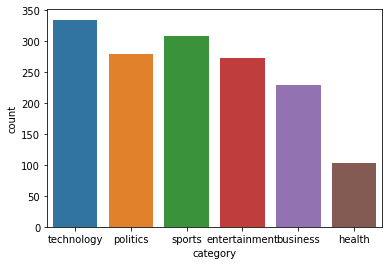

In [145]:
sns.countplot(data.category)

In [146]:
data['News_length'] = data['Text'].str.len()
print(data['News_length'])

0       101
1        88
2       106
3        96
4        87
       ... 
1525     59
1526     48
1527     57
1528     39
1529     45
Name: News_length, Length: 1530, dtype: int64


# Distribution Plot

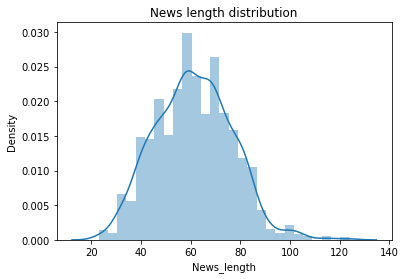

In [147]:
sns.distplot(data['News_length']).set_title('News length distribution');


# WordCloud

In [148]:
def create_wordcloud(words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

In [149]:
subset=data[data.category=="business"]
text=subset.Text.values
words =" ".join(text)
# create_wordcloud(words)

In [150]:
subset=data[data.category=="entertainment"]
text=subset.Text.values
words =" ".join(text)
# create_wordcloud(words)

In [151]:
subset=data[data.category=="politics"]
text=subset.Text.values
words =" ".join(text)
# create_wordcloud(words)

In [152]:
subset=data[data.category=="sport"]
text=subset.Text.values
words =" ".join(text)
# create_wordcloud(words)

In [153]:
subset=data[data.category=="tech"]
text=subset.Text.values
words =" ".join(text)
# create_wordcloud(words)

# Feature Engineering

Removing the special characters<br>
1) \r<br>
2) \n<br>

Removing Punctuations and Stopwords

In [154]:

snowball_stemmer = SnowballStemmer('english')
wordnet_lemmatizer = WordNetLemmatizer()

class Preprocess:
    def __int__(self):
        pass

    def autospell(self,text):
        """
        correct the spelling of the word.
        """
        spells = [spell(w) for w in (nltk.word_tokenize(text))]
        return " ".join(spells)

    def to_lower(self,text):
        """
        :param text:
        :return:
            Converted text to lower case as in, converting "Hello" to "hello" or "HELLO" to "hello".
        """
        return text.lower()

    def remove_numbers(self,text):
        """
        take string input and return a clean text without numbers.
        Use regex to discard the numbers.
        """
        output = ''.join(c for c in text if not c.isdigit())
        return output

    def remove_punct(self,text):
        """
        take string input and clean string without punctuations.
        use regex to remove the punctuations.
        """
        return ''.join(c for c in text if c not in punctuation)

    def remove_Tags(self,text):
        """
        take string input and clean string without tags.
        use regex to remove the html tags.
        """
        cleaned_text = re.sub('<[^<]+?>', '', text)
        return cleaned_text

    def sentence_tokenize(self,text):
        """
        take string input and return list of sentences.
        use nltk.sent_tokenize() to split the sentences.
        """
        sent_list = []
        for w in nltk.sent_tokenize(text):
            sent_list.append(w)
        return sent_list

    def word_tokenize(self,text):
        """
        :param text:
        :return: list of words
        """
        return [w for sent in nltk.sent_tokenize(text) for w in nltk.word_tokenize(sent)]

    def remove_stopwords(self,sentence):
        """
        removes all the stop words like "is,the,a, etc."
        """
        stop_words = stopwords.words('english')
        return ' '.join([w for w in nltk.word_tokenize(sentence) if not w in stop_words])

    def stem(self,text):
        """
        :param word_tokens:
        :return: list of words
        """
        stemmed_word = [snowball_stemmer.stem(word) for sent in nltk.sent_tokenize(text)for word in nltk.word_tokenize(sent)]
        return " ".join(stemmed_word)

    def lemmatize(self,text):
        lemmatized_word = [wordnet_lemmatizer.lemmatize(word)for sent in nltk.sent_tokenize(text)for word in nltk.word_tokenize(sent)]
        return " ".join(lemmatized_word)


    def preprocess(self,text):
        lower_text = self.to_lower(text)
        sentence_tokens = self.sentence_tokenize(lower_text)
        word_list = []
        for each_sent in sentence_tokens:
            lemmatizzed_sent = self.lemmatize(each_sent)
            clean_text = self.remove_numbers(lemmatizzed_sent)
            clean_text = self.remove_punct(clean_text)
            clean_text = self.remove_Tags(clean_text)
            clean_text = self.remove_stopwords(clean_text)
            word_tokens = self.word_tokenize(clean_text)
            for i in word_tokens:
                word_list.append(i)
        return word_list

In [155]:
data['Text_parsed'] = data['Text'].apply(process_text)

In [156]:
data.head()

,Text,category,News_length,Text_parsed
0,tv future in the hands of viewers with home th...,technology,101,tv future in the hands of viewers with home th...
1,Microsoft Is Retiring Internet Explorer in 202...,technology,88,Microsoft Is Retiring Internet Explorer in 202...
2,Cryptocurrency Market Sees a Massive Dip as Bi...,technology,106,Cryptocurrency Market Sees a Massive Dip as Bi...
3,NASA Releases Stunning Image Of Huge Glacier M...,technology,96,NASA Releases Stunning Image Of Huge Glacier M...
4,OnePlus 9R Getting OxygenOS 11.2.1.2 in India ...,technology,87,OnePlus 9R Getting OxygenOS 11.2.1.2 in India ...


# Label Encoding

In [157]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
data['category_target']= label_encoder.fit_transform(data['category']) 

In [158]:
data.head()

,Text,category,News_length,Text_parsed,category_target
0,tv future in the hands of viewers with home th...,technology,101,tv future in the hands of viewers with home th...,5
1,Microsoft Is Retiring Internet Explorer in 202...,technology,88,Microsoft Is Retiring Internet Explorer in 202...,5
2,Cryptocurrency Market Sees a Massive Dip as Bi...,technology,106,Cryptocurrency Market Sees a Massive Dip as Bi...,5
3,NASA Releases Stunning Image Of Huge Glacier M...,technology,96,NASA Releases Stunning Image Of Huge Glacier M...,5
4,OnePlus 9R Getting OxygenOS 11.2.1.2 in India ...,technology,87,OnePlus 9R Getting OxygenOS 11.2.1.2 in India ...,5


In [159]:
data.to_csv('data_processed.csv')

# Split the data in Training and testing

In [160]:
X_train, X_test, y_train, y_test = train_test_split(data['Text_parsed'], 
                                                    data['category_target'], 
                                                    test_size=0.2, 
                                                    random_state=8)

In [161]:
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300

In [162]:
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)
                        
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)





[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(306, 196)


# Building Models

# Random Forest

In [163]:
from sklearn.ensemble import RandomForestClassifier
model  = RandomForestClassifier(random_state=1)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.8562091503267973
              precision    recall  f1-score   support

           0       0.88      0.76      0.81        46
           1       0.89      0.81      0.85        59
           2       0.85      0.85      0.85        27
           3       0.96      0.85      0.90        52
           4       0.79      0.98      0.87        56
           5       0.83      0.86      0.84        66

    accuracy                           0.86       306
   macro avg       0.86      0.85      0.86       306
weighted avg       0.86      0.86      0.86       306



In [164]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

# Hyper Paramater Tuning(Random Forest)

In [165]:
from sklearn.model_selection import GridSearchCV
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(model, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(features_train, labels_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


In [166]:
bestF.best_params_

{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [167]:
from sklearn.ensemble import RandomForestClassifier
model1  = RandomForestClassifier(random_state=1,max_depth= 30, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100)
model1.fit(features_train, labels_train)
model_predictions = model1.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.7189542483660131
              precision    recall  f1-score   support

           0       0.93      0.57      0.70        46
           1       0.96      0.76      0.85        59
           2       0.81      0.48      0.60        27
           3       1.00      0.65      0.79        52
           4       0.41      1.00      0.59        56
           5       1.00      0.70      0.82        66

    accuracy                           0.72       306
   macro avg       0.85      0.69      0.73       306
weighted avg       0.86      0.72      0.74       306



# Logistic Regression

In [100]:
model = LogisticRegression()
print(model.get_params())
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Accuracy:  0.7352941176470589
              precision    recall  f1-score   support

           0       0.61      0.61      0.61        46
           1       0.80      0.80      0.80        59
           2       0.88      0.52      0.65        27
           3       0.80      0.77      0.78        52
           4       0.64      0.82      0.72        56
           5       0.79      0.76      0.78        66

    accuracy                           0.74       306
   macro avg       0.75      0.71      0.72       306
weighted avg       0.75      0.74      0.73       306



# Hyper Parameter Tuning (Logistic Regression)

In [101]:
param_grid = {'C': [0.1,0.001,1],
    # Create a list of options for the regularization penalty
    'penalty' : ['l1', 'l2'] }
clf = GridSearchCV(model, param_grid, cv = 3, verbose = 1)

bestF = clf.fit(features_train, labels_train)
bestF.best_params_

Fitting 3 folds for each of 6 candidates, totalling 18 fits


{'C': 1, 'penalty': 'l2'}

In [102]:
model = LogisticRegression(C=1)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.7352941176470589
              precision    recall  f1-score   support

           0       0.61      0.61      0.61        46
           1       0.80      0.80      0.80        59
           2       0.88      0.52      0.65        27
           3       0.80      0.77      0.78        52
           4       0.64      0.82      0.72        56
           5       0.79      0.76      0.78        66

    accuracy                           0.74       306
   macro avg       0.75      0.71      0.72       306
weighted avg       0.75      0.74      0.73       306



# KNeighborsClassifier

Accuracy remains the same after hyper paramter tuning

In [103]:
model = KNeighborsClassifier()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.6633986928104575
              precision    recall  f1-score   support

           0       0.48      0.63      0.54        46
           1       0.63      0.75      0.68        59
           2       0.73      0.59      0.65        27
           3       0.84      0.62      0.71        52
           4       0.64      0.61      0.62        56
           5       0.77      0.73      0.75        66

    accuracy                           0.66       306
   macro avg       0.68      0.65      0.66       306
weighted avg       0.68      0.66      0.67       306



In [104]:
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

# Hyper Paramaters Tuning (KNeighborsClassifier)

In [105]:
from sklearn.model_selection import GridSearchCV
params_KNN = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7], 
              'p': [1, 2, 5]}


gridF = GridSearchCV(model, params_KNN, cv = 5, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(features_train, labels_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


In [106]:
bestF.best_params_

{'n_neighbors': 1, 'p': 2}

In [107]:
model = KNeighborsClassifier(n_neighbors=7,p=2)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.6503267973856209
              precision    recall  f1-score   support

           0       0.47      0.59      0.52        46
           1       0.70      0.73      0.72        59
           2       0.78      0.52      0.62        27
           3       0.82      0.63      0.72        52
           4       0.58      0.59      0.58        56
           5       0.67      0.74      0.71        66

    accuracy                           0.65       306
   macro avg       0.67      0.63      0.64       306
weighted avg       0.67      0.65      0.65       306



# Decision Tree

In [108]:
model = DecisionTreeClassifier(random_state=1)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.8627450980392157
              precision    recall  f1-score   support

           0       0.84      0.80      0.82        46
           1       0.92      0.81      0.86        59
           2       0.83      0.89      0.86        27
           3       0.96      0.88      0.92        52
           4       0.79      0.93      0.85        56
           5       0.85      0.86      0.86        66

    accuracy                           0.86       306
   macro avg       0.86      0.86      0.86       306
weighted avg       0.87      0.86      0.86       306



In [109]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'best'}

# Hyper Paramter Tuning (Decision Tree)

In [110]:
import numpy as np
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

min_samples_leaf = randint(1,9)

criterion = ['gini', 'entropy']
max_depth = [3,None]



hyperF = dict(max_depth=max_depth,
                      criterion=criterion,
                      min_samples_leaf=min_samples_leaf)

model  = DecisionTreeClassifier(random_state=1)
gridF = RandomizedSearchCV(model, hyperF, cv = 3, verbose = 1)
bestF = gridF.fit(features_train, labels_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [111]:
bestF.best_params_

{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1}

In [112]:
model = DecisionTreeClassifier(random_state=1,criterion= 'entropy', max_depth= None,min_samples_leaf=6)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.6405228758169934
              precision    recall  f1-score   support

           0       0.54      0.61      0.57        46
           1       0.68      0.66      0.67        59
           2       0.73      0.59      0.65        27
           3       0.80      0.71      0.76        52
           4       0.63      0.55      0.59        56
           5       0.56      0.68      0.62        66

    accuracy                           0.64       306
   macro avg       0.66      0.63      0.64       306
weighted avg       0.65      0.64      0.64       306



# GaussianNB

In [113]:
model = GaussianNB()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.6797385620915033
              precision    recall  f1-score   support

           0       0.48      0.76      0.59        46
           1       0.76      0.69      0.73        59
           2       0.44      1.00      0.61        27
           3       0.89      0.65      0.76        52
           4       0.83      0.54      0.65        56
           5       0.93      0.62      0.75        66

    accuracy                           0.68       306
   macro avg       0.72      0.71      0.68       306
weighted avg       0.76      0.68      0.69       306



# Doc2Vec

In [114]:
bbc = pd.DataFrame()

In [115]:
bbc['Text'] = data['Text_parsed']

In [116]:
bbc['category'] = data['category_target']

In [117]:
bbc.head()

,Text,category
0,tv future in the hands of viewers with home th...,5
1,Microsoft Is Retiring Internet Explorer in 202...,5
2,Cryptocurrency Market Sees a Massive Dip as Bi...,5
3,NASA Releases Stunning Image Of Huge Glacier M...,5
4,OnePlus 9R Getting OxygenOS 11.2.1.2 in India ...,5


In [118]:
# from tqdm import tqdm
# tqdm.pandas(desc="progress-bar")
# # from gensim.models import Doc2Vec
# from sklearn import utils
# # import gensim
# # from gensim.models.doc2vec import TaggedDocument
# import re

# # def label_sentences(corpus, label_type):
# #     """
# #     Gensim's Doc2Vec implementation requires each document/paragraph to have a label associated with it.
# #     We do this by using the TaggedDocument method. The format will be "TRAIN_i" or "TEST_i" where "i" is
# #     a dummy index of the post.
# #     """
# #     labeled = []

    
# #     for i, v in enumerate(corpus):
# #         label = label_type + '_' + str(i)
# #         labeled.append(TaggedDocument(v.split(), [label]))
    
# #     return labeled


# X_train, X_test, y_train, y_test = train_test_split(data.Text, data.category, random_state=0, test_size=0.3)

# X_train = label_sentences(X_train, 'Train')
# X_test = label_sentences(X_test, 'Test')
# all_data = X_train + X_test

In [119]:
# all_data[0:2]

In [120]:
# import numpy as np
# def get_vectors(model, corpus_size, vectors_size, vectors_type):
#     """
#     Get vectors from trained doc2vec model
#     :param doc2vec_model: Trained Doc2Vec model
#     :param corpus_size: Size of the data
#     :param vectors_size: Size of the embedding vectors
#     :param vectors_type: Training or Testing vectors
#     :return: list of vectors
#     """
#     vectors = np.zeros((corpus_size, vectors_size))
#     for i in range(0, corpus_size):
#         prefix = vectors_type + '_' + str(i)
#         vectors[i] = model.docvecs[prefix]
#     return vectors
    
# train_vectors_dbow = get_vectors(model_dbow, len(X_train), 300, 'Train')
# test_vectors_dbow = get_vectors(model_dbow, len(X_test), 300, 'Test')

# Logistic Regression

In [121]:
model = LogisticRegression(n_jobs=1, C=1e5)
model = model.fit(features_train, y_train)
model_prediction = model.predict(features_test)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.8006535947712419
              precision    recall  f1-score   support

           0       0.67      0.67      0.67        46
           1       0.83      0.90      0.86        59
           2       0.80      0.74      0.77        27
           3       0.85      0.79      0.82        52
           4       0.81      0.84      0.82        56
           5       0.82      0.80      0.81        66

    accuracy                           0.80       306
   macro avg       0.80      0.79      0.79       306
weighted avg       0.80      0.80      0.80       306



In [122]:
model = GaussianNB()
model = model.fit(features_train, y_train)
model_prediction = model.predict(features_test)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.6797385620915033
              precision    recall  f1-score   support

           0       0.48      0.76      0.59        46
           1       0.76      0.69      0.73        59
           2       0.44      1.00      0.61        27
           3       0.89      0.65      0.76        52
           4       0.83      0.54      0.65        56
           5       0.93      0.62      0.75        66

    accuracy                           0.68       306
   macro avg       0.72      0.71      0.68       306
weighted avg       0.76      0.68      0.69       306



# Random Forest

In [123]:
model = RandomForestClassifier()
model = model.fit(features_train, y_train)
model_prediction = model.predict(features_test)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.8758169934640523
              precision    recall  f1-score   support

           0       0.88      0.76      0.81        46
           1       0.87      0.92      0.89        59
           2       0.83      0.89      0.86        27
           3       0.96      0.85      0.90        52
           4       0.84      0.96      0.90        56
           5       0.88      0.86      0.87        66

    accuracy                           0.88       306
   macro avg       0.88      0.87      0.87       306
weighted avg       0.88      0.88      0.88       306



# Hyper Parameter Tuning (Random Forest)

In [124]:
from sklearn.model_selection import GridSearchCV
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(model, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(features_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


In [125]:
bestF.best_params_

{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [126]:
model = RandomForestClassifier(max_depth=15,min_samples_leaf=1,min_samples_split=2,n_estimators=1200)
model = model.fit(features_train, y_train)
model_prediction = model.predict(features_test)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.6437908496732027
              precision    recall  f1-score   support

           0       1.00      0.41      0.58        46
           1       1.00      0.54      0.70        59
           2       0.86      0.44      0.59        27
           3       1.00      0.60      0.75        52
           4       0.35      1.00      0.51        56
           5       0.98      0.71      0.82        66

    accuracy                           0.64       306
   macro avg       0.86      0.62      0.66       306
weighted avg       0.86      0.64      0.67       306



# Decision Tree

In [127]:
train_vectors_dbow = features_train
test_vectors_dbow = features_test
model = DecisionTreeClassifier()
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.8562091503267973
              precision    recall  f1-score   support

           0       0.84      0.80      0.82        46
           1       0.92      0.81      0.86        59
           2       0.83      0.89      0.86        27
           3       0.96      0.85      0.90        52
           4       0.76      0.93      0.84        56
           5       0.85      0.86      0.86        66

    accuracy                           0.86       306
   macro avg       0.86      0.86      0.86       306
weighted avg       0.86      0.86      0.86       306



# Hyper Parameter Tuning (Decision Tree)

In [128]:
import numpy as np
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

min_samples_leaf = randint(1,9)

criterion = ['gini', 'entropy']
max_depth = [3,None]



hyperF = dict(max_depth=max_depth,
                      criterion=criterion,
                      min_samples_leaf=min_samples_leaf)

model  = DecisionTreeClassifier(random_state=1)
gridF = RandomizedSearchCV(model, hyperF, cv = 3, verbose = 1)
bestF = gridF.fit(train_vectors_dbow, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [129]:
bestF.best_params_

{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1}

In [130]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=None,min_samples_leaf=7)
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.6241830065359477
              precision    recall  f1-score   support

           0       0.47      0.80      0.60        46
           1       0.69      0.63      0.65        59
           2       0.73      0.59      0.65        27
           3       0.76      0.73      0.75        52
           4       0.54      0.48      0.51        56
           5       0.69      0.55      0.61        66

    accuracy                           0.62       306
   macro avg       0.65      0.63      0.63       306
weighted avg       0.64      0.62      0.63       306



# KNeighborsClassifier

In [131]:
model = KNeighborsClassifier()
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.6633986928104575
              precision    recall  f1-score   support

           0       0.48      0.63      0.54        46
           1       0.63      0.75      0.68        59
           2       0.73      0.59      0.65        27
           3       0.84      0.62      0.71        52
           4       0.64      0.61      0.62        56
           5       0.77      0.73      0.75        66

    accuracy                           0.66       306
   macro avg       0.68      0.65      0.66       306
weighted avg       0.68      0.66      0.67       306



# Hyper Parameter Tuning (KNeighborsClassifier)

In [132]:
from sklearn.model_selection import GridSearchCV
params_KNN = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7], 
              'p': [1, 2, 5]}


gridF = GridSearchCV(model, params_KNN, cv = 5, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(train_vectors_dbow, y_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


In [133]:
bestF.best_params_

{'n_neighbors': 1, 'p': 2}

In [134]:
model = KNeighborsClassifier(n_neighbors=6,p=2)
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.6437908496732027
              precision    recall  f1-score   support

           0       0.47      0.63      0.54        46
           1       0.65      0.76      0.70        59
           2       0.78      0.52      0.62        27
           3       0.80      0.62      0.70        52
           4       0.57      0.55      0.56        56
           5       0.73      0.70      0.71        66

    accuracy                           0.64       306
   macro avg       0.67      0.63      0.64       306
weighted avg       0.66      0.64      0.65       306

